## Data exploration

- Twaice data set sent via email Feb 10th

First step is to choose the tools we want to use and read in the data. We decide to use plotly due to the interactive feature, maybe this is what Twaice uses in their software anyways so good to learn. 

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from pathlib import Path

cell_meta_data = pd.ExcelFile('batch.xlsx') #using ExcelFile object
cell_parameters_overview = pd.read_excel('batch.xlsx', sheet_name=0) #for test parameter setup
list_cell_names = cell_meta_data.sheet_names #get cell_id as a list

In [3]:
data_dic = dict()
for i in list(range(1,max(range(len(list_cell_names)))+1)):
    data_dic[list_cell_names[i]] = pd.read_excel('batch.xlsx', sheet_name=i)

In [4]:
dic_unique_conditions = dict()
for conditions in list(cell_parameters_overview):
    dic_unique_conditions[conditions] = cell_parameters_overview[conditions].unique()
for conditions in list(cell_parameters_overview):
    print(f"Data set has for {conditions} these unique parameters: {dic_unique_conditions[conditions]}")

Data set has for Cell these unique parameters: [ 1  2  4  5  6  8  9 10 12 13 14]
Data set has for AgingType these unique parameters: ['Cyclic']
Data set has for T these unique parameters: [25 40 10]
Data set has for mSOC these unique parameters: [50 80 20 40]
Data set has for DOD these unique parameters: [100  30  60]
Data set has for C_ch these unique parameters: [1.  0.5 1.4]
Data set has for C_dis these unique parameters: [2.  1.  0.5 2.3]


In [5]:
fec_input = {
    "Cells": ["Cell_01","Cell_02","Cell_04","Cell_05","Cell_06","Cell_08","Cell_09","Cell_10","Cell_12","Cell_13","Cell_14"],
    "Datapoints" : [40,42,51,59,133,51,122,24,17,75,51],
    "fec" : [40,42,51,59,133*0.3,51*0.6,122*0.3,24,17,75*0.6,51*0.6]
    }
data_fec = pd.DataFrame(fec_input)
data_fec.head(2)

,Cells,Datapoints,fec
0,Cell_01,40,40.0
1,Cell_02,42,42.0


In [16]:
color_dic = {
    "Cell_01":"turquoise",
    "Cell_02":"maroon",
    "Cell_04":"wheat",
    "Cell_05":"mediumblue",
    "Cell_06":"yellow",
    "Cell_08":"pink",
    "Cell_09":"mediumpurple",
    "Cell_10":"peachpuff",
    "Cell_12":"midnightblue",
    "Cell_13":"dodgerblue",
    "Cell_14":"red"
}
fig1 = make_subplots(rows=2,cols=1,shared_xaxes=True, 
                    specs=[[{"secondary_y":True}],[{"secondary_y":True}]]
                           )

for cell_id in list_cell_names[1::]:
    fig1.add_trace(
        go.Scatter(
            x=list(range(1,int(data_fec.fec[data_fec.Cells == cell_id]))),
            y = data_dic[cell_id].EFC,
            name = f"{cell_id}_EFC",
            mode = "markers",
            marker = dict(
                color = color_dic[cell_id],
                size = 10
            ),
            legendgroup="group",
            legendgrouptitle_text = "effective flexible capacity data"

        ),
        secondary_y=False, row=1, col=1   
    )
    fig1.add_trace(
        go.Scatter(
            x=list(range(1,int(data_fec.fec[data_fec.Cells == cell_id]))),
            y = data_dic[cell_id].SOHc_measurement,
            name = f"{cell_id}_SOHc",
            mode = "markers",
            marker = dict(
                color = color_dic[cell_id],
                symbol = "diamond",
                size = 10
            ),
            legendgroup="group2",
            legendgrouptitle_text = "state of health capacity data"
            
        ),
        secondary_y=False,row=2,col=1  
    )

fig1.update_layout(
    title = {'text':"Data discovery of Scoot-e cells powered by Twaice, literally", 'y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},
    legend=dict(groupclick="toggleitem")
)
fig1.update_xaxes(
    title_text = "full equivalent cycle /-", row=2,col=1
)
fig1.update_yaxes(
    title_text = "EFC / mAh", row=1,col=1
)
fig1.update_yaxes(
    title_text = "SOH_ capacity /  ", row=2,col=1
)
#fig1.show()
fig1.update_layout(legend=dict(groupclick="toggleitem", font=dict(size = 10)))


## Data discovery
- non-interactive plot will be saved here
- .html plot will be saved as well to open in chrom browser

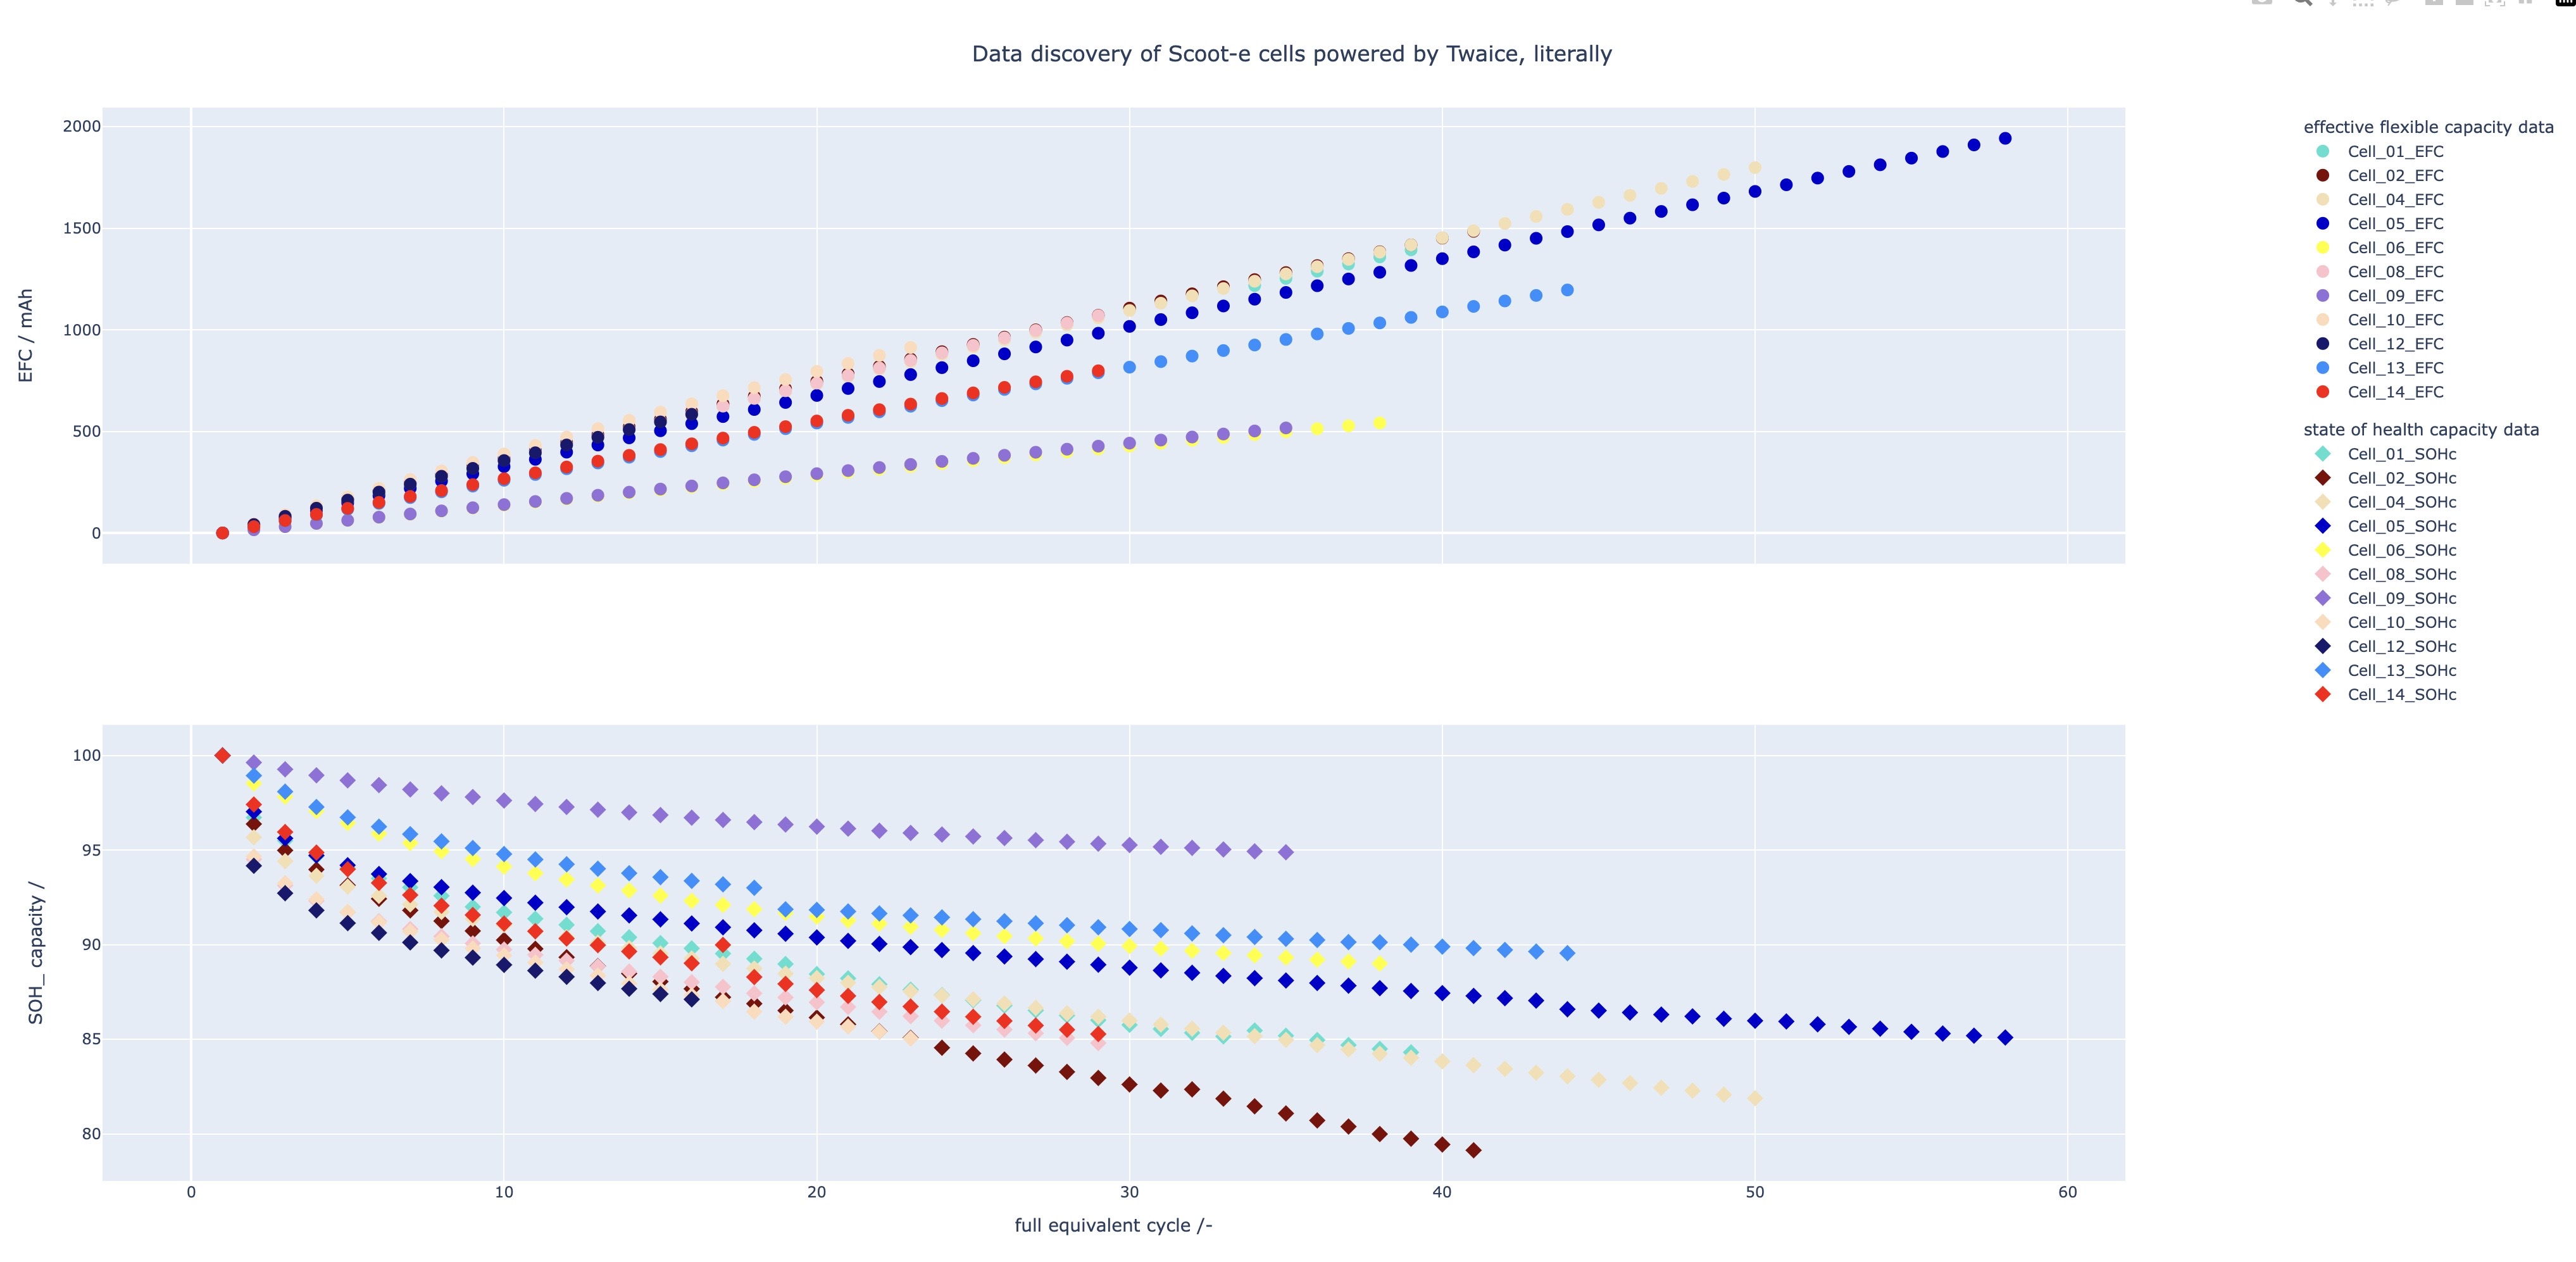

In [20]:
from pathlib import Path
from IPython import display
import kaleido
working_path = Path(r"/Users/lukasgraser/Library/CloudStorage/OneDrive-Personal/Orga/Bewerbung/Twaice_Bewerbung/Experience_day_prep")
fig1.write_image(working_path / "scoot_e_data.pdf", width=400, height = 2000)
display.Image(working_path / "dashboard2D.jpg")

# Write an html file

In [8]:
fig1.write_html(working_path / "scoot_e_data.html")
